# **Recipe for Rating: Predict Food Ratings using ML**
In this challenge our goal is to build models that can guess the ratings for each recipe using the given dataset. 

## Importing the necessary packages 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# EDA

## Dataset

Columns Description

    RecipeNumber: Placement of the recipe on the top 100 recipes list
    RecipeCode: Unique ID of the recipe used by the site
    RecipeName: Name of the recipe the comment was posted on
    CommentID: Unique ID of the comment
    UserID: Unique ID of the user who left the comment
    UserName: Name of the user
    UserReputation: Internal score of the site, roughly quantifying the past behavior of the user
    CreationTimestamp: Time at which the comment was posted as a Unix timestamp
    ReplyCount: Number of replies to the comment
    ThumbsUpCount: Number of up-votes the comment has received
    ThumbsDownCount: Number of down-votes the comment has received
    Rating: The score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given (Target Variable)
    BestScore: Score of the comment, likely used by the site to help determine the order comments appear in
    Recipe_Review: Text content of the comment


In [2]:
# Train data
data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
# Sample data
sample =  pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')
sample

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4
...,...,...
995,996,3
996,997,0
997,998,1
998,999,0


In [4]:
# Test data
test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


## Stats and Visualisation

In [5]:
data.shape,test.shape

((13636, 15), (4546, 14))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


- Only two missing values in RecipeReview

In [7]:
data.nunique(0)

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

- Most Categorical columns (like commentID,UserID) are unique for each row, hence not contributing to any trend and its best to drop them.

In [8]:
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [9]:
data['RecipeName'].value_counts()

RecipeName
Cheeseburger Soup             553
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos             65
Caramel Heavenlies             64
Blueberry French Toast         64
Vegetarian Linguine            19
Name: count, Length: 100, dtype: int64

- There are 100 unique recipes in the dataset

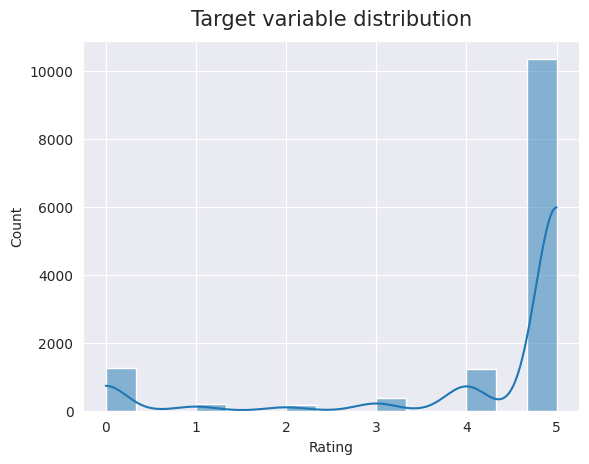

None

-2.128448045999372

In [11]:
# Target variable distribution
sb.set_style('darkgrid')
plt.figure()
sb.histplot(data.Rating, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), data.Rating.skew())

- Data is imbalanced as target variable (Rating) in train is heavely skewed towards right (5)

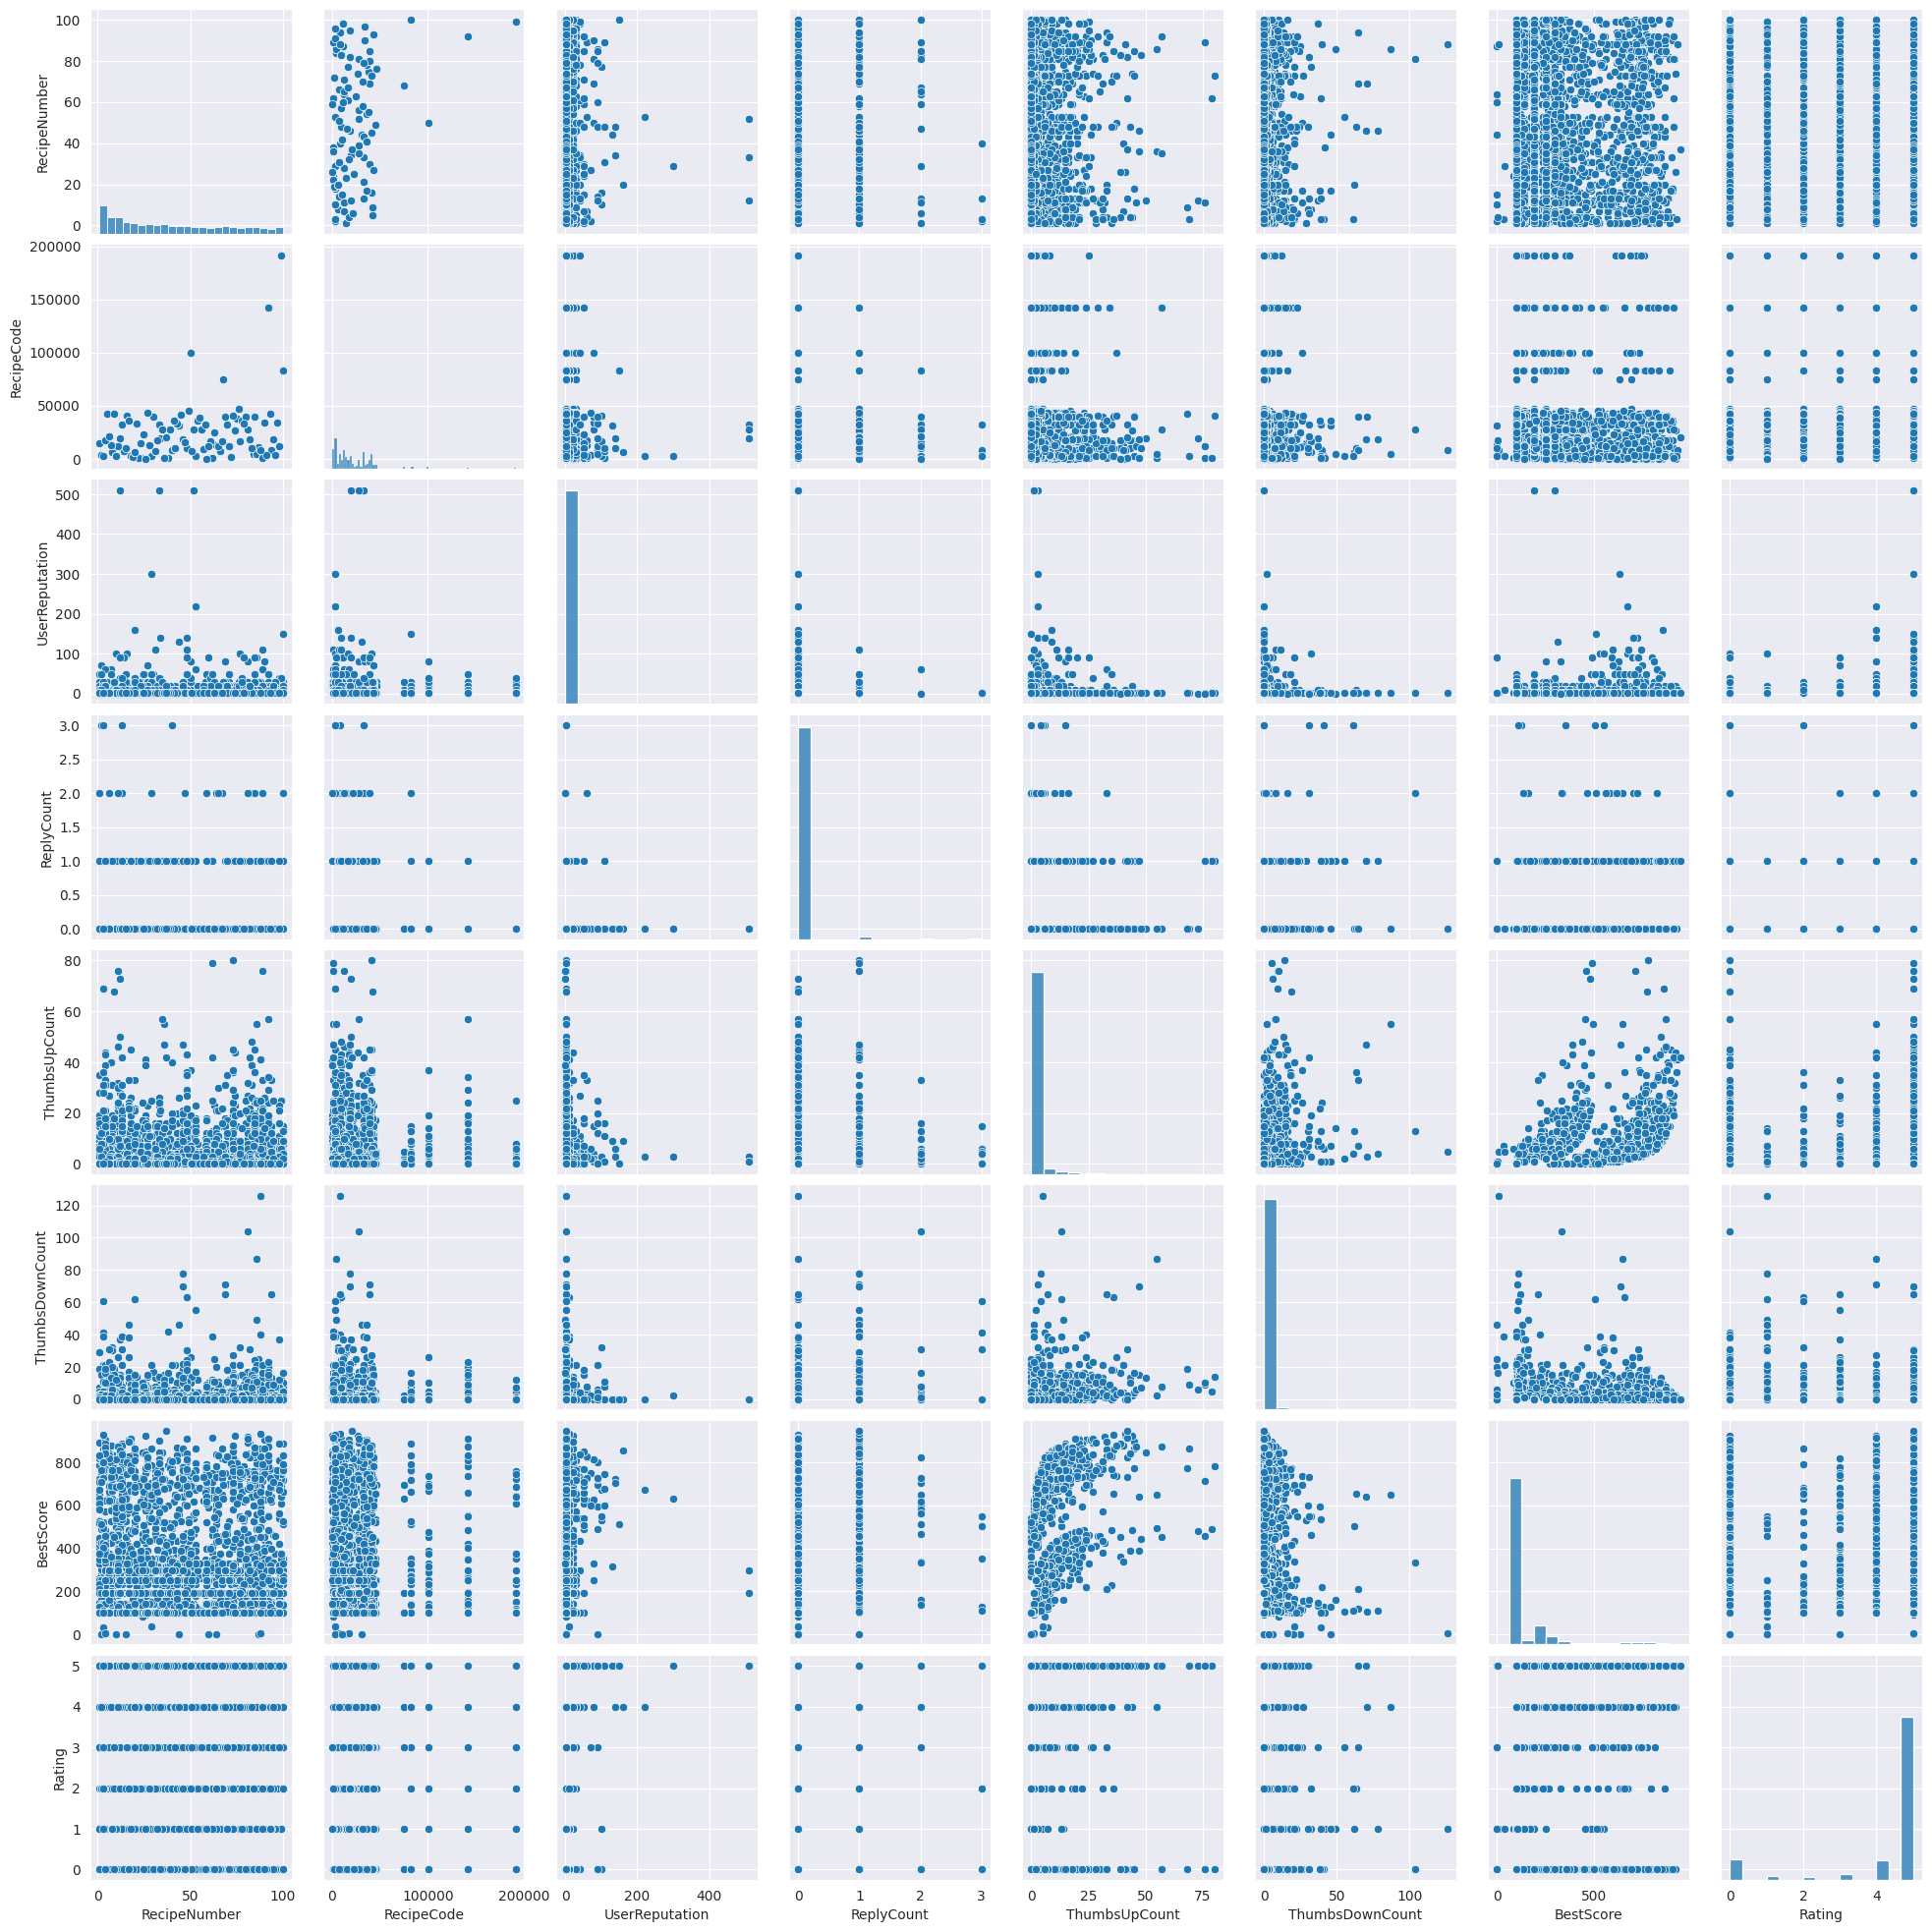

In [12]:
#pair-plots across all the features
df = data[['RecipeNumber', 'RecipeCode', 'UserReputation', 'ReplyCount','ThumbsUpCount', 'ThumbsDownCount','BestScore','Rating']]
sb.pairplot(df)

- important graphs to focus on from the previous one
- No strong trend is apparent between features (including with the target (Rating))

<Axes: >

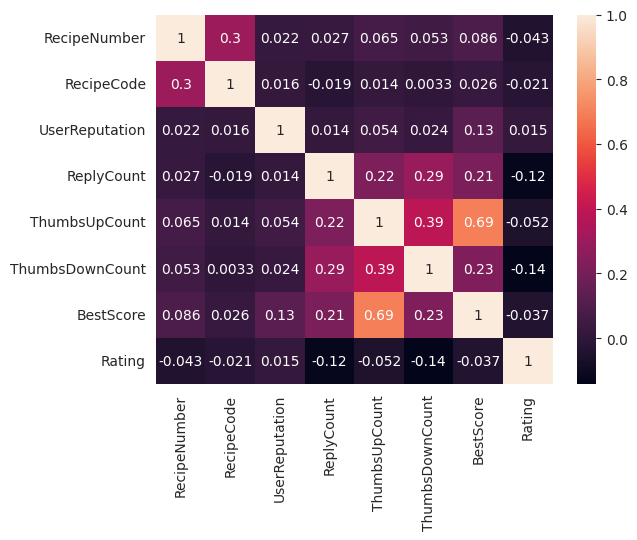

In [13]:
myd=data[['RecipeNumber','RecipeCode','UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore','Rating']]
corre = pd.DataFrame(myd).corr()
sb.heatmap(corre,annot= True,xticklabels = True,yticklabels = True)

 - Rating has **no strong** correlation with any other feature.
 - Rating has negligible postive correlation with UserReputation
 - Rating has very weak negative correlation with ThumbsDownCount and ReplyCount
 - BestScore has moderate-strong positive correlation with ThumbsUpCount
 - BestScore has weak positive correlation with ThumbsDownCount,ReplyCount and UserReputation


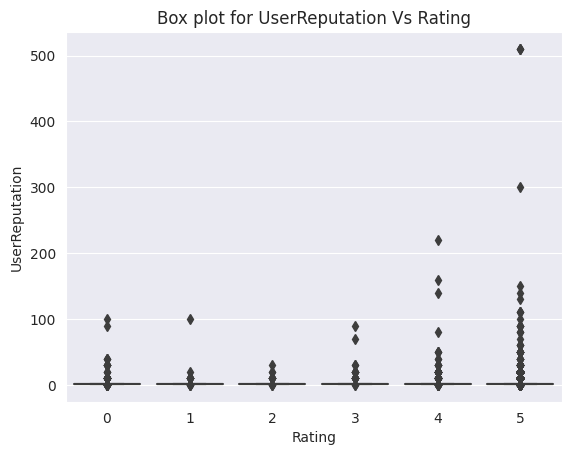

In [14]:
#Rating Vs UserReputation 
plt.title("Box plot for UserReputation Vs Rating")
sb.boxplot( y = 'UserReputation', x = 'Rating', data = data )
plt.show()

- On Mean there is no trend between UserReputation and Rating.
- However, on outliers, as reviews Rating increases, the UserReputation also increases. 

Text(0.5, 1.0, 'Scatter plot of BestScore vs. ThumbsUpCount across Ratings')

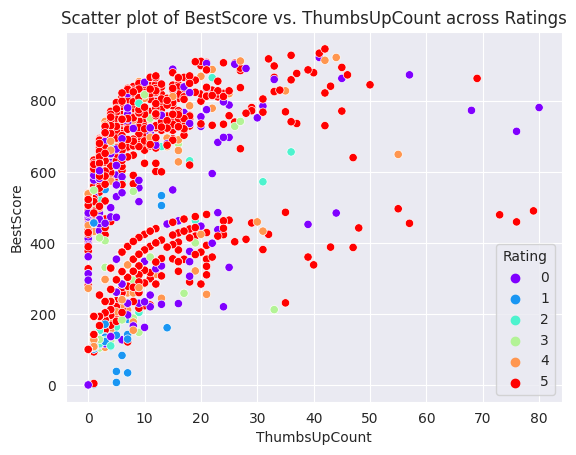

In [175]:
#BestScore vs. ThumbsUpCount across Ratings
plt.figure()
ax = sb.scatterplot(x='ThumbsUpCount',y='BestScore',data=data, hue = 'Rating', palette='rainbow')
ax.set_title('Scatter plot of BestScore vs. ThumbsUpCount across Ratings')

- slight clustering of reviews (higher and lower BestScore) can be observed. 

Text(0.5, 1.0, 'Scatter plot of ReplyCount')

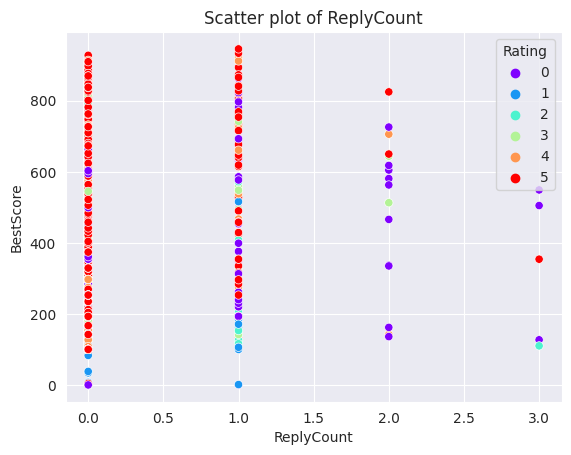

In [176]:
#BestScore vs. ReplyCount across Ratings
plt.figure()
ax = sb.scatterplot(x='ReplyCount',y='BestScore',data=data, hue = 'Rating', palette='rainbow')
ax.set_title('Scatter plot of ReplyCount')

- Reviews with fewer ReplyCount (<=1) have the Highest rating (5)
- And, Reviews which have more ReplyCount(>=2) have more number of 0 Rating

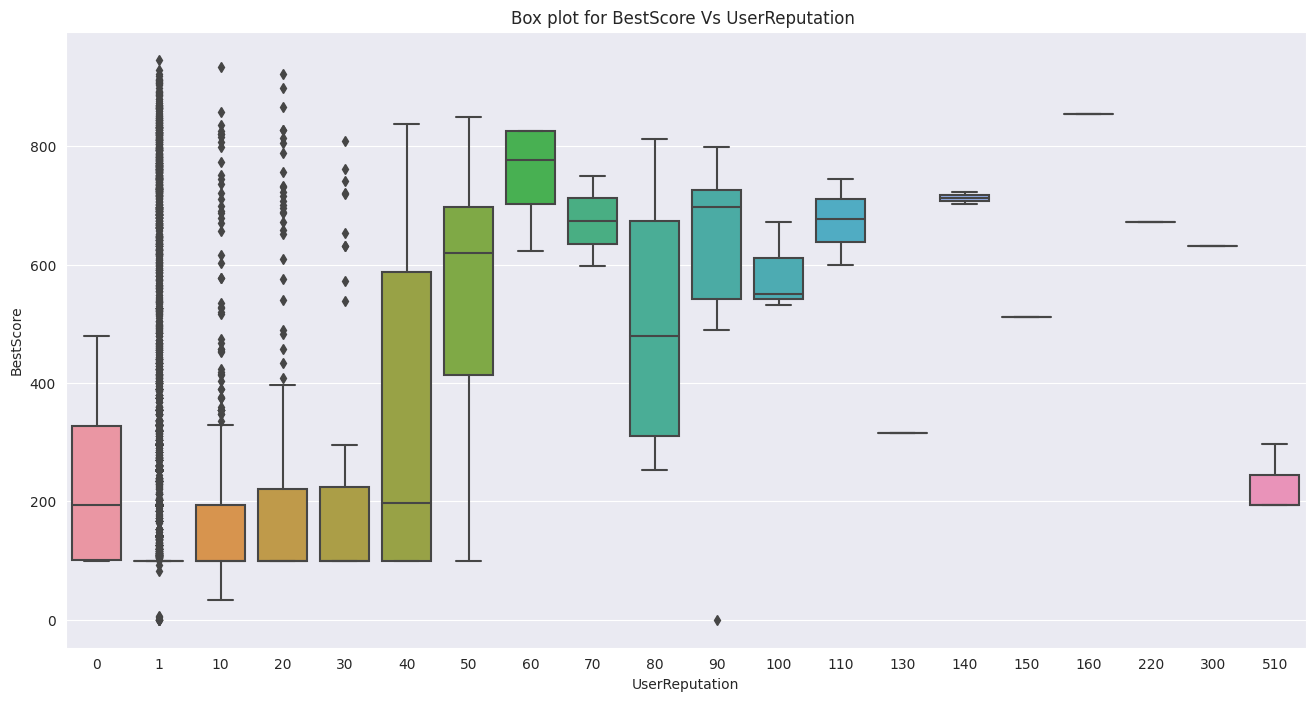

In [15]:
#delete
plt.figure(figsize = (16,8))
plt.title("Box plot for BestScore Vs UserReputation ")
sb.boxplot( y = 'BestScore', x = 'UserReputation', data = data)
plt.show()

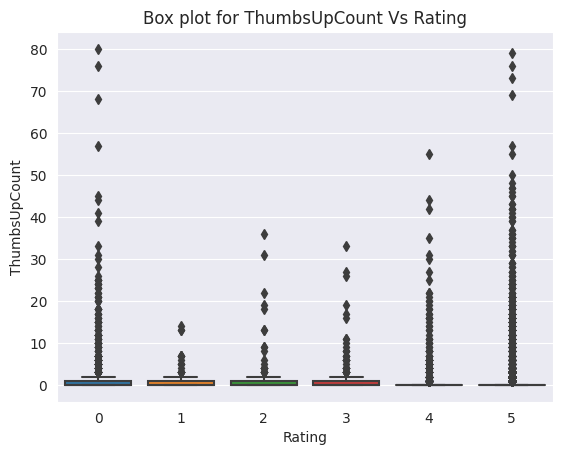

In [17]:
#ThumbsUpCount Vs Rating
# plt.figure(figsize = (16,8))
plt.title("Box plot for ThumbsUpCount Vs Rating")
sb.boxplot( y = 'ThumbsUpCount', x = 'Rating', data = df)
plt.show()

- Reviews with highest ThumbsUpCount are mostly give lowest or highest Rating.
    - This can indicate that users found those users like/support reviews that are on extreme end of the spectrum.
   

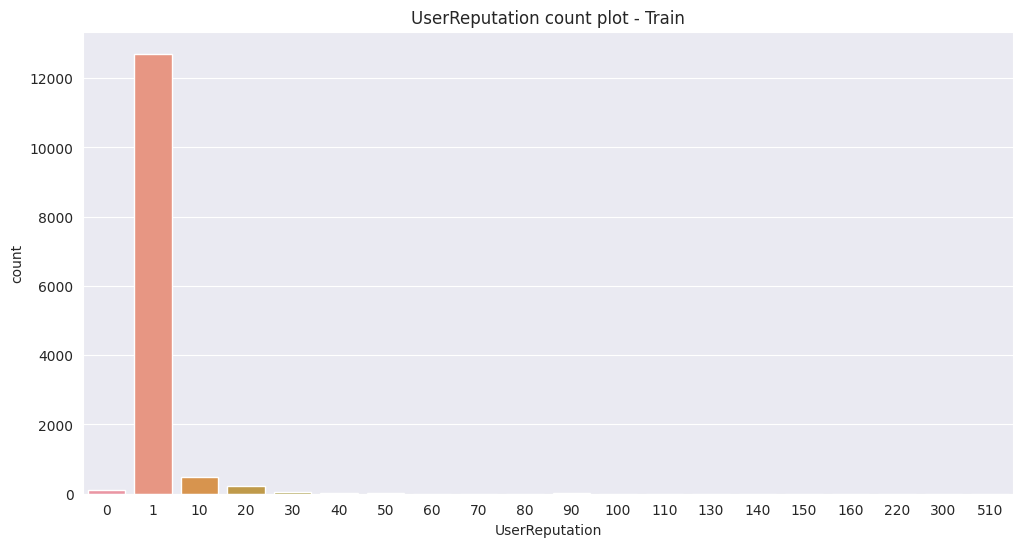

In [182]:
#UserReputation countplot
plt.figure(figsize = (12, 6))
sb.countplot(x = 'UserReputation', data = data)
plt.title('UserReputation count plot - Train')
plt.show()

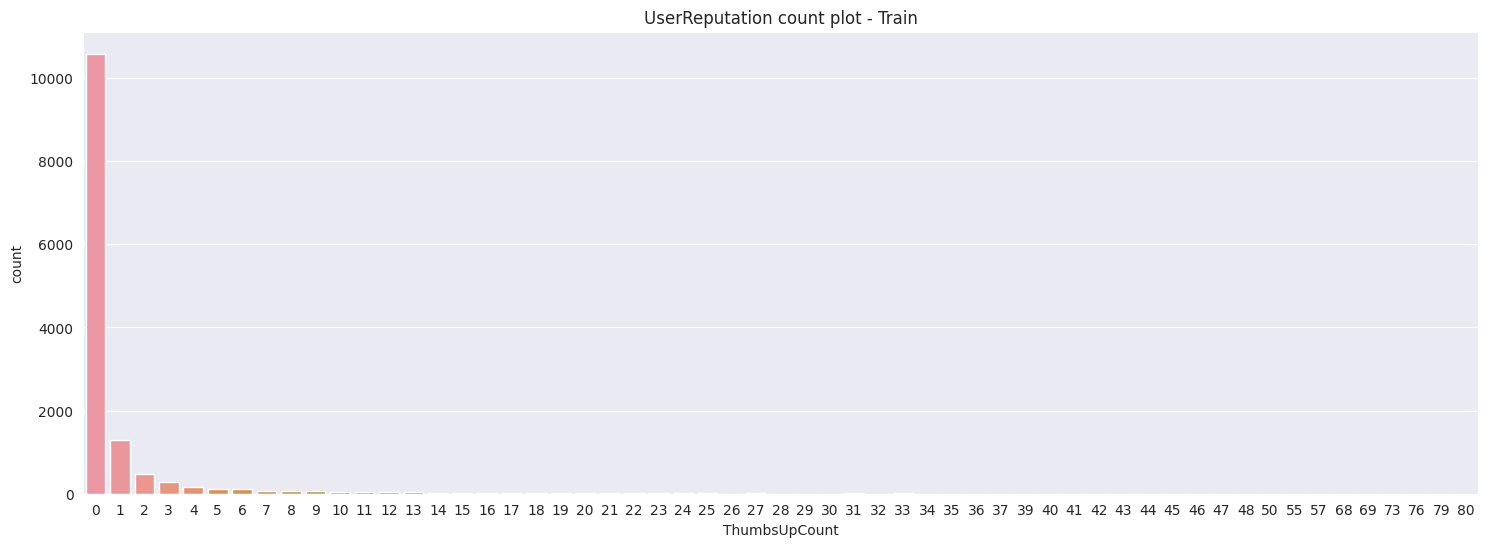

In [184]:
# UserReputation countplot
plt.figure(figsize = (18, 6))
sb.countplot(x = 'ThumbsUpCount', data = data)
# sb.histplot(data.UserReputation)
plt.title('UserReputation count plot - Train')
plt.show()

# Data Preprocessing

In [2]:
# DONT DELETE
data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
#drop columns - id/unique features, categorical features, no correlation features
data = data.drop(['ID','CommentID','UserName','UserID','CreationTimestamp','RecipeName'],axis=1)

In [4]:
#imputing
data['Recipe_Review']=pd.DataFrame(data['Recipe_Review']).replace(np.nan,'')

In [5]:
#Pipeline
#Scaling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = ['RecipeNumber','RecipeCode','UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore']
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scaler, num_features),
    ], 
    remainder = 'passthrough',
    verbose_feature_names_out=False)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)]).set_output(transform='pandas')

In [6]:
data=pipeline.fit_transform(data)
data.head()

,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating,Recipe_Review
0,1.091144,-0.398914,1.768748,-0.105742,-0.263606,-0.166499,-0.376842,5,great recipe! I have made them just as written...
1,1.664089,-0.568789,-0.115041,-0.105742,-0.263606,0.139729,-0.376842,5,This is an easy and quick recipe that is great...
2,-1.200636,-0.793641,-0.115041,-0.105742,-0.263606,-0.166499,-0.376842,3,I think I was looking for something extra spec...
3,0.383389,3.286533,-0.115041,-0.105742,-0.263606,-0.166499,-0.376842,5,This is our favorite grilled chicken recipe. ...
4,-0.897312,-0.086047,-0.115041,-0.105742,-0.263606,-0.166499,-0.376842,4,Great basic recipe. I added 2 teaspoons Tuscan...


In [7]:
#slpitting with stratifying
x = data.drop('Rating',axis=1)  
y = data['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0,stratify=y)

In [8]:
#seperating numerical and categorical features
x_train_num = x_train.drop('Recipe_Review',axis=1)
x_train_text = x_train['Recipe_Review']

x_test_num = x_test.drop('Recipe_Review',axis=1)
x_test_text = x_test['Recipe_Review']

In [10]:
#Feature Extraction
from sklearn.feature_selection import SelectPercentile,mutual_info_regression
print(f'Shape of of feature matrix before feature selection:{x_train_num.shape}')
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(x_train_num,y_train)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')

Shape of of feature matrix before feature selection:(10227, 7)
Shape of of feature matrix after feature selection:(10227, 2)


In [11]:
### text vectorizing TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(x_train_text)

<10227x9179 sparse matrix of type '<class 'numpy.float64'>'
	with 295130 stored elements in Compressed Sparse Row format>

In [13]:
x_train_text_vec = tfidf.fit_transform(x_train_text)
x_test_text_vec = tfidf.transform(x_test_text)

In [14]:
### stacking the data
x_train_stacked = np.hstack([x_train_num,x_train_text_vec.toarray()])
x_test_stacked = np.hstack([x_test_num,x_test_text_vec.toarray()])

In [15]:
x_train_stacked.shape,x_test_stacked.shape

((10227, 9186), (3409, 9186))

In [109]:
### PCA
from sklearn.decomposition import PCA
pca = PCA(0.96)
x_train_pca = pca.fit_transform(x_train_stacked)
x_test_pca = pca.transform(x_test_stacked)
x_train_pca.shape

(10227, 525)

# Model training

### M1 : Logistic Regression

In [16]:
lor = LogisticRegression(max_iter=5000)
lor.fit(x_train_stacked,y_train)

LogisticRegression(max_iter=5000)

In [59]:
print("Trainig accuracy:", lor.score(x_train_stacked,y_train) , "\nTesting accuracy:", lor.score(x_test_stacked,y_test))

Trainig accuracy: 0.8102082722205926 
Testing accuracy: 0.772953945438545


In [260]:
# y_pred = lor.predict(x_test_stacked)
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

#### Hyper Parameter Tuning of M1

In [74]:
lor = LogisticRegression()
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l2','none'],
    'solver' : ['lbfgs'],
    'max_iter' : [5000,7000]
    }
]
clf = GridSearchCV(lor, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [75]:
# best_clf = clf.fit(x_train_stacked,y_train)
# print("Best Hyperparameters:", best_clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Best Hyperparameters: {'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [76]:
#scores with tuned hyper parameters
lor = LogisticRegression(max_iter=5000,penalty='l2',solver='lbfgs')
lor.fit(x_train_stacked,y_train)
print("Trainig accuracy:", lor.score(x_train_stacked,y_train) , "\nTesting accuracy:", lor.score(x_test_stacked,y_test))

Trainig accuracy: 0.8102082722205926 
Testing accuracy: 0.772953945438545


### Model 2 : RandomForest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_stacked,y_train)
print("Trainig accuracy:", rfc.score(x_train_stacked,y_train) , "\nTesting accuracy:", rfc.score(x_test_stacked,y_test))

Trainig accuracy: 0.999315537303217 
Testing accuracy: 0.769140510413611


In [113]:
#HyperParameter Tuning of Model 2

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10,20],      # Maximum depth of each tree
#     'bootstrap': [True, False]
# }
# clf = GridSearchCV(rfc, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

# best_clf = clf.fit(x_train_stacked,y_train)
# print("Best Hyperparameters:", best_clf.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 200}


In [114]:
#scores with tuned hyper parameters
rfc = RandomForestClassifier(bootstrap=True,max_depth=None,n_estimators=200)
rfc.fit(x_train_stacked,y_train)
print("Trainig accuracy:", rfc.score(x_train_stacked,y_train) , "\nTesting accuracy:", rfc.score(x_test_stacked,y_test))

Trainig accuracy: 0.9994133176884717 
Testing accuracy: 0.7688471692578469


### Model 3 : HistGradientBoost (Best)

In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgc = HistGradientBoostingClassifier()
hgc.fit(x_train_stacked,y_train)
hgc.score(x_train_stacked,y_train) , hgc.score(x_test_stacked,y_test)
print("Trainig accuracy:", hgc.score(x_train_stacked,y_train) , "\nTesting accuracy:", hgc.score(x_test_stacked,y_test))

Trainig accuracy: 0.8821746357680649 
Testing accuracy: 0.776767380463479


#### HyperParameter Tuning of Model 3

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}
clf = GridSearchCV(hgc, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

In [103]:
# best_clf = clf.fit(x_train_stacked,y_train)
# print("Best Hyperparameters:", best_clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3}


- saved input
- 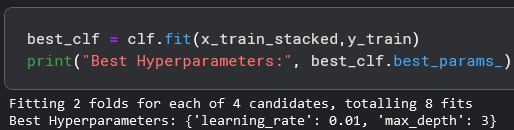

In [95]:
#scores with tuned hyper parameters
hgc = HistGradientBoostingClassifier(learning_rate=0.01,max_depth=3)
hgc.fit(x_train_stacked,y_train)
hgc.score(x_train_stacked,y_train) , hgc.score(x_test_stacked,y_test)

(0.762198103060526, 0.761513640363743)

### Model 4 : SGDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=7000)
sgd.fit(x_train_stacked,y_train)
print("Trainig accuracy:", sgd.score(x_train_stacked,y_train) , "\nTesting accuracy:", sgd.score(x_test_stacked,y_test))

Trainig accuracy: 0.8268309377138946 
Testing accuracy: 0.7682604869463185


### Model 5: XGBoost classifier

In [38]:
### xgb
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgbc = xgb.XGBClassifier()

# Train the model
xgbc.fit(x_train_stacked, y_train)

# Make predictions
y_train_pred = xgbc.predict(x_train_stacked)
y_test_pred = xgbc.predict(x_test_stacked)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9281314168377823
Testing Accuracy: 0.7776474039307715


### Models performances 

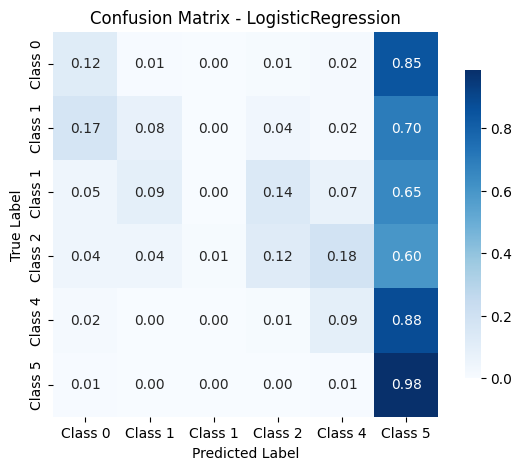

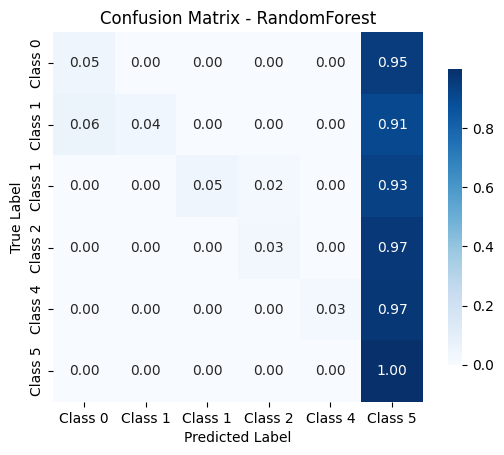

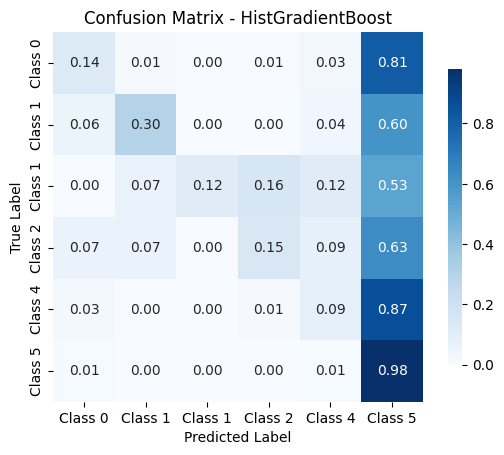

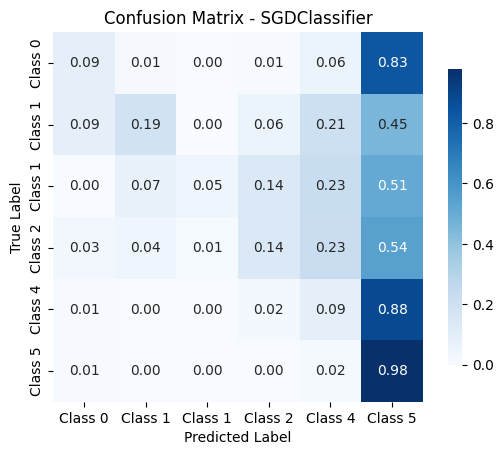

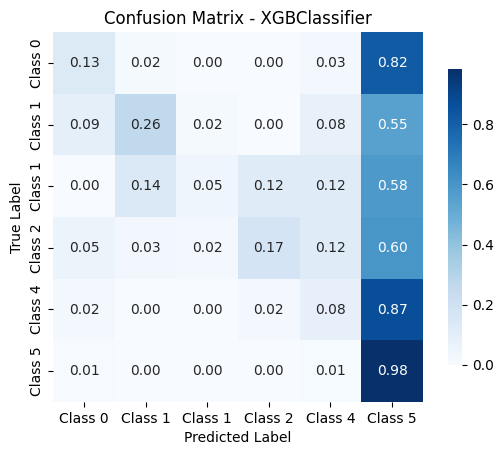

In [41]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix_multiclass(models, X_test, y_test, labels=None):
    plt.figure(figsize=(7, 5))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", square=True,
                    xticklabels=labels, yticklabels=labels,
                    cbar_kws={"shrink": 0.8})
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
models= {"LogisticRegression":lor,"RandomForest":rfc,"HistGradientBoost":hgc,"SGDClassifier":sgd,"XGBClassifier":xgbc}
plot_confusion_matrix_multiclass(models, x_test_stacked, y_test, labels=['Class 0', 'Class 1','Class 1','Class 2' , 'Class 4' ,'Class 5'])

# Submission

### pre processing Test data

In [326]:
test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [327]:
#drop columns
test = test.drop(['ID','CommentID','UserName','UserID','CreationTimestamp','RecipeName'],axis=1)

In [328]:
#missing values
test.replace('?',np.nan,inplace = True)
test.isna().sum()

RecipeNumber       0
RecipeCode         0
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
Recipe_Review      0
dtype: int64

In [329]:
#scaling
ss = StandardScaler()
data_num_scaled=ss.fit_transform(test[['RecipeNumber','RecipeCode','UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore']])
test[['RecipeNumber','RecipeCode','UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore']] = data_num_scaled

In [330]:
#text vectorizing 
test_num = test.drop('Recipe_Review',axis=1)
test_text = test['Recipe_Review']

test_text_vec = tfidf.transform(test_text)

In [331]:
### stacking the data
test_stacked = np.hstack([test_num,test_text_vec.toarray()])
test_stacked.shape

(4546, 9186)

### prediction on Test data

In [332]:
test_prediction = hgc.predict(test_stacked)

In [340]:
#submission csv
submission = pd.DataFrame(columns=['ID','Rating'])
submission['ID'] = [i for i in range(1,len(test_prediction)+1)]
submission['Rating'] = test_prediction
submission.to_csv('submission.csv',index=False)